# Logistic Regression Project (Predict Ad click)

In this notebook we will use `Logistic Regression` to indicating whether or not a particular internet user clicked on an Advertisement. We will try to create a model that will predict whether or not they will click on an ad based off the features of that user.

This data set contains the following features:

* '`Daily Time Spent on Site`': consumer time on site in minutes
* '`Age`': customer age in years
* '`Area Income`': Avg. Income of geographical area of consumer
* '`Daily Internet Usage`': Avg. minutes a day consumer is on the internet
* '`Ad Topic Line`': Headline of the advertisement
* '`City`': City of consumer
* '`Male`': Whether or not consumer was male
* '`Country`': Country of consumer
* '`Timestamp`': Time at which consumer clicked on Ad or closed window
* '`Clicked on Ad`': 0 or 1 indicated clicking on Ad

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")

## Get the Data

In [26]:
df = pd.read_csv("data/advertising.csv")
df

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0
...,...,...,...,...,...,...,...,...,...,...
995,72.97,30,71384.57,208.58,Fundamental modular algorithm,Duffystad,1,Lebanon,2016-02-11 21:49:00,1
996,51.30,45,67782.17,134.42,Grass-roots cohesive monitoring,New Darlene,1,Bosnia and Herzegovina,2016-04-22 02:07:01,1
997,51.63,51,42415.72,120.37,Expanded intangible solution,South Jessica,1,Mongolia,2016-02-01 17:24:57,1
998,55.55,19,41920.79,187.95,Proactive bandwidth-monitored policy,West Steven,0,Guatemala,2016-03-24 02:35:54,0


# 1. Exploratory Data Analysis

In [4]:
df.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,65.000200,36.009000,55000.000080,180.000100,0.481000,0.50000
std,15.853615,8.785562,13414.634022,43.902339,0.499889,0.50025
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000
25%,51.360000,29.000000,47031.802500,138.830000,0.000000,0.00000
50%,68.215000,35.000000,57012.300000,183.130000,0.000000,0.50000
75%,78.547500,42.000000,65470.635000,218.792500,1.000000,1.00000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,1.00000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


In [25]:
df["Clicked on Ad"].value_counts()

Clicked on Ad
0    500
1    500
Name: count, dtype: int64

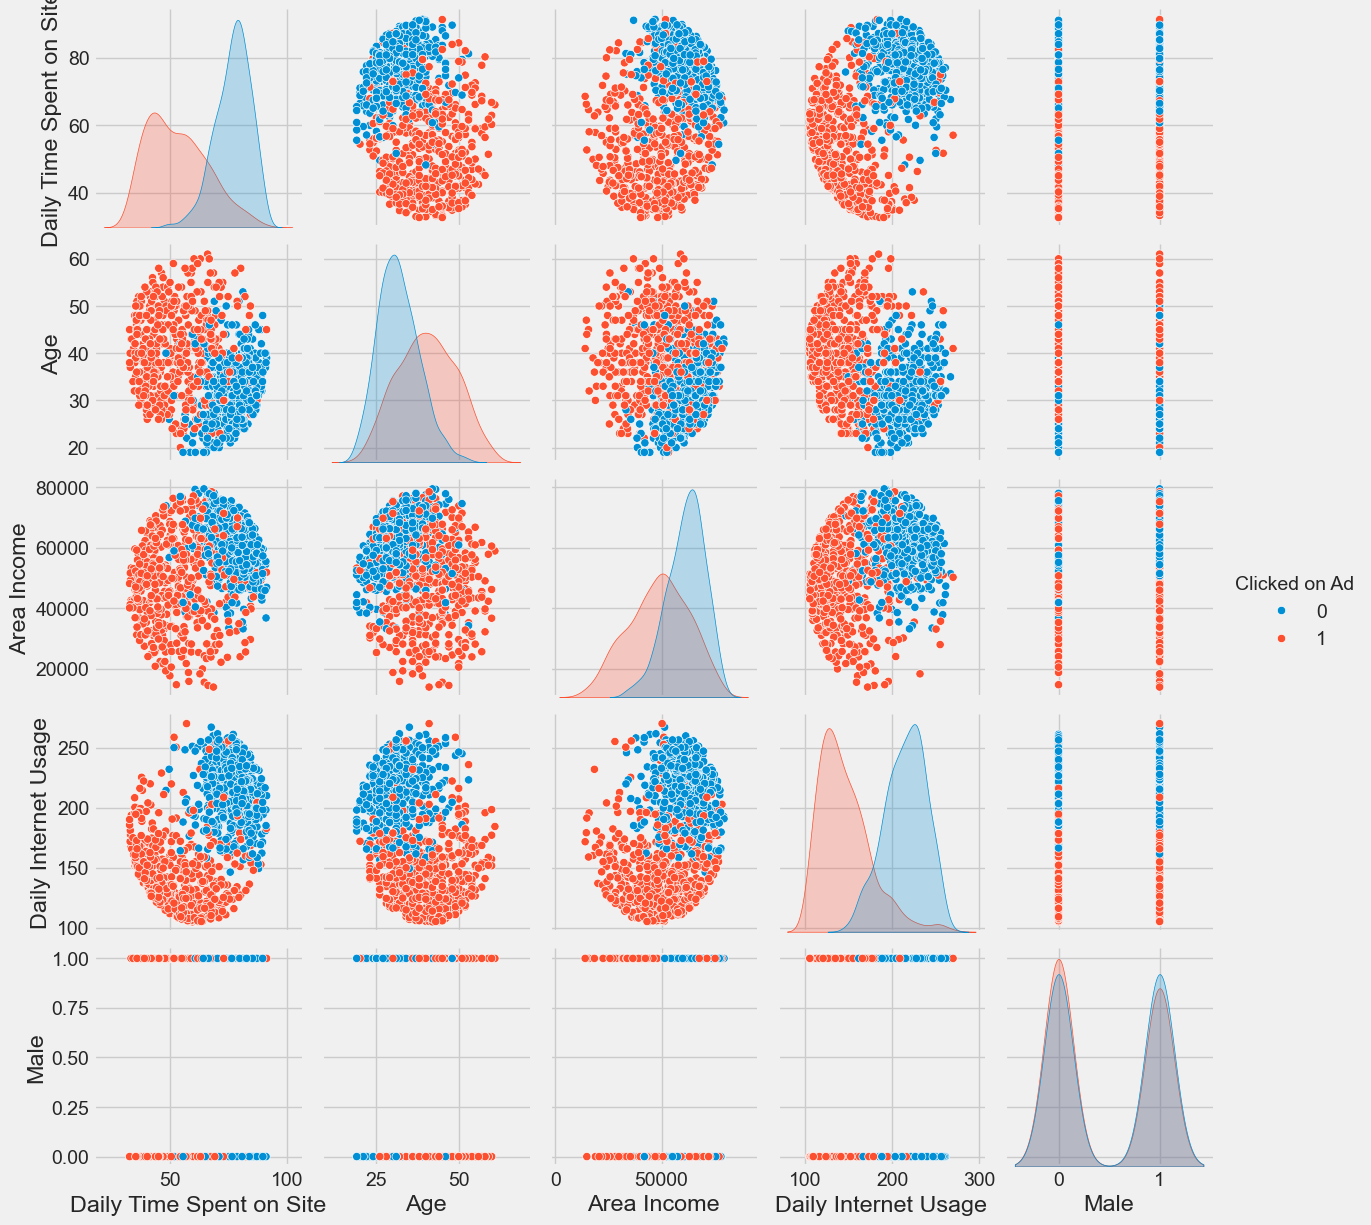

In [10]:
# en el sns.pairplot , metele de argumento hue= "Clicked on Ad"
sns.pairplot(df, hue="Clicked on Ad")
plt.show()

In [17]:
dataframe = df.drop(columns=["Ad Topic Line", "City", "Country", "Timestamp"])

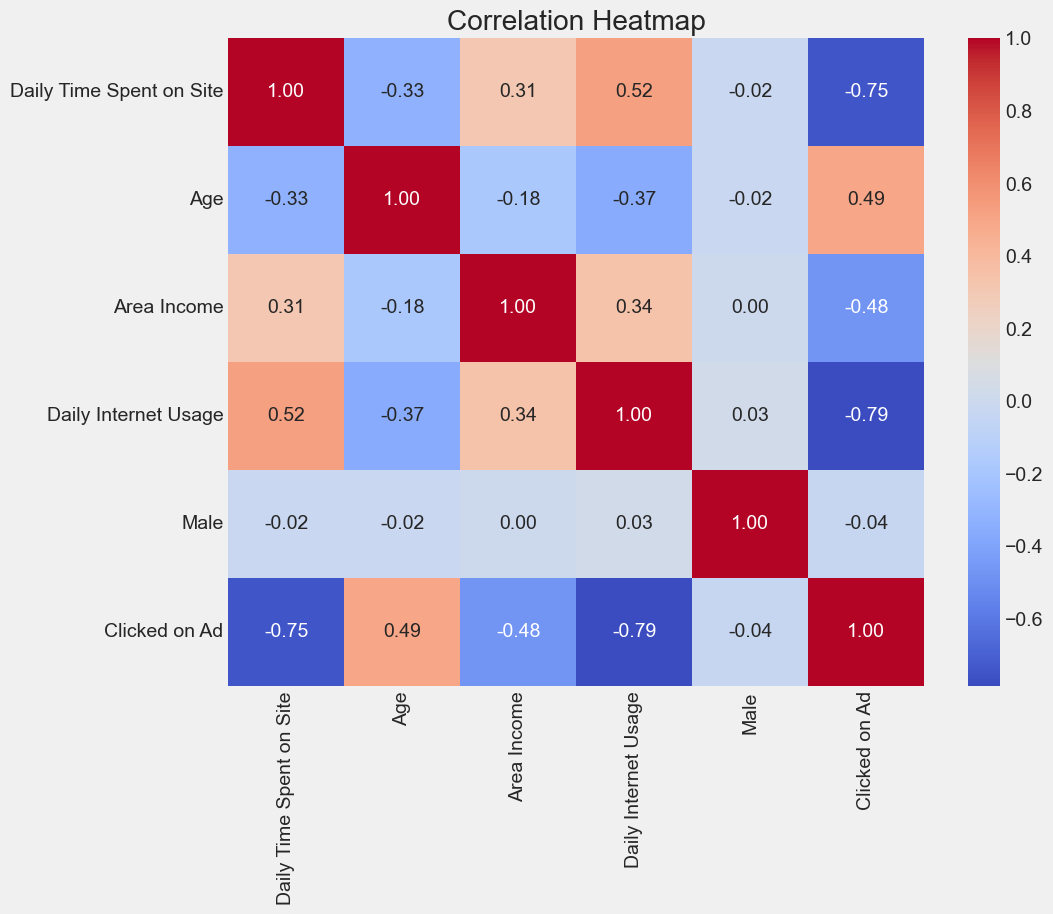

In [18]:
plt.figure(figsize=(10, 8))
sns.heatmap(dataframe.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

# 2. Prepare Data for Logistic Regression



#### 1. Feature engineering


In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [41]:
# Separate features (X) and target (y)
X = dataframe.drop(columns=["Clicked on Ad"])
y = dataframe["Clicked on Ad"]

# Check if categorical variables need encoding (e.g., Male)
if X["Male"].dtype == "object":
    encoder = LabelEncoder()
    X["Male"] = encoder.fit_transform(X["Male"])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Display the updated prepared data
X_train.head(), y_train.head()

(     Daily Time Spent on Site  Age  Area Income  Daily Internet Usage  Male
 687                     73.27   28     67301.39                216.24     1
 500                     51.56   46     63102.19                124.85     0
 332                     56.30   49     67430.96                135.24     1
 979                     70.29   31     56974.51                254.65     1
 817                     54.47   23     46780.09                141.52     0,
 687    0
 500    1
 332    1
 979    0
 817    1
 Name: Clicked on Ad, dtype: int64)

In [27]:
# Crea una columna en donde si "orchestration" se encuentra dentro de "Ad Topic Line" valga 1 y si no 0

df["Contains_Orchestration"] = df["Ad Topic Line"].str.contains("orchestration", case=False, na=False).astype(int)
df

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad,Contains_Orchestration
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0,1
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0,0
...,...,...,...,...,...,...,...,...,...,...,...
995,72.97,30,71384.57,208.58,Fundamental modular algorithm,Duffystad,1,Lebanon,2016-02-11 21:49:00,1,0
996,51.30,45,67782.17,134.42,Grass-roots cohesive monitoring,New Darlene,1,Bosnia and Herzegovina,2016-04-22 02:07:01,1,0
997,51.63,51,42415.72,120.37,Expanded intangible solution,South Jessica,1,Mongolia,2016-02-01 17:24:57,1,0
998,55.55,19,41920.79,187.95,Proactive bandwidth-monitored policy,West Steven,0,Guatemala,2016-03-24 02:35:54,0,0


In [32]:
# Aplica un Label Encoder a Ad Topic Line y City
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

# Encode the "Ad Topic Line" column
df["Ad Topic Line Encoded"] = label_encoder.fit_transform(df["Ad Topic Line"])

# Encode the "City" column
df["City Encoded"] = label_encoder.fit_transform(df["City"])

df.head()


,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad,Contains_Orchestration,Ad Topic Line Encoded,City Encoded
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0,1,91,961
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0,0,464,903
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0,0,566,111
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0,0,903,939
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0,0,766,805


In [ ]:
# Haz un drop de la siguentes columnas 'Ad Topic Line', 'City', 'Male', 'Country', 'orchestration'



In [36]:
# Convert the "Timestamp" column to datetime
df["Timestamp"] = pd.to_datetime(df["Timestamp"])

# Display the updated dataframe to confirm the conversion
df[["Timestamp"]].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Timestamp  1000 non-null   datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 7.9 KB


In [38]:
# Crea tres columnas nuevas que sean: "month", "hour", "weekday".
# Usa la columna "Timestamp" para extraer esos valores

# Create new columns for "month", "hour", and "weekday"
df["month"] = df["Timestamp"].dt.month
df["hour"] = df["Timestamp"].dt.hour
df["weekday"] = df["Timestamp"].dt.weekday

df.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad,Contains_Orchestration,Ad Topic Line Encoded,City Encoded,month,hour,weekday
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0,1,91,961,3,0,6
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0,0,464,903,4,1,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0,0,566,111,3,20,6
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0,0,903,939,1,2,6
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0,0,766,805,6,3,4


<AxesSubplot:>

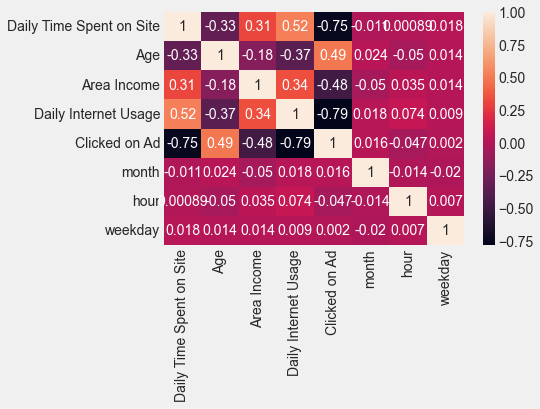

In [40]:
# Ahora haz un drop de las columnas 'month', 'hour', 'weekday'.
# Si ya sé que las acabas de crear, pero asi es la vida :)

df.drop(columns = ["month", "hour", "weekday"], inplace = True)
df.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad,Contains_Orchestration,Ad Topic Line Encoded,City Encoded
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0,1,91,961
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0,0,464,903
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0,0,566,111
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0,0,903,939
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0,0,766,805



#### 2. Train test split



#### 3. StandardScaler()


In [42]:
from sklearn.preprocessing import StandardScaler

In [ ]:
# Lo siguiente es la forma correcta de hacerlo, existe la posibilidad de hacer scaler.fit_transform pero no es recomendable

In [43]:

scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [44]:
scaler.inverse_transform(X_train)

array([[7.327000e+01, 2.800000e+01, 6.730139e+04, 2.162400e+02,
        1.000000e+00],
       [5.156000e+01, 4.600000e+01, 6.310219e+04, 1.248500e+02,
        0.000000e+00],
       [5.630000e+01, 4.900000e+01, 6.743096e+04, 1.352400e+02,
        1.000000e+00],
       ...,
       [7.394000e+01, 2.600000e+01, 5.541106e+04, 2.361500e+02,
        1.000000e+00],
       [7.864000e+01, 3.100000e+01, 6.028347e+04, 2.352800e+02,
        1.000000e+00],
       [4.206000e+01, 3.400000e+01, 4.324119e+04, 1.315500e+02,
        0.000000e+00]])

# 3. Implement Logistic Regression in Scikit-Learn and predict

In [47]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X, y)

c:\Users\alex_\miniconda3\envs\Data_analysis\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [48]:
predictions = model.predict(X)
print(predictions)

[0 0 0 0 0 0 0 1 0 0 1 0 1 0 1 0 1 1 1 1 0 0 1 0 1 0 1 1 1 0 0 0 1 0 1 0 1
 0 1 1 0 0 0 0 0 1 0 1 1 1 0 0 1 1 1 0 1 1 0 1 0 0 0 0 1 0 1 1 0 1 1 1 1 1
 1 0 1 0 1 1 0 0 1 1 0 1 0 1 1 1 1 0 0 1 1 0 1 1 1 0 1 0 0 0 0 0 0 1 1 0 1
 1 0 1 0 0 1 1 1 1 0 0 0 1 1 0 1 1 0 0 1 1 1 0 1 1 1 1 0 1 0 1 1 0 1 1 1 1
 1 1 0 0 1 0 0 0 1 0 0 0 0 0 0 0 1 1 1 0 1 0 1 1 0 0 1 0 1 0 1 0 1 0 1 0 0
 1 1 0 0 1 1 1 1 1 0 1 1 0 0 0 0 0 1 0 0 1 0 0 1 1 0 1 0 1 0 0 1 1 1 1 0 0
 1 1 1 0 1 1 0 0 0 1 1 0 1 1 1 0 1 0 1 1 0 0 0 1 1 0 1 0 0 1 0 0 1 0 0 1 0
 1 0 1 1 1 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 1 0 1 0 0 0 1 0 0 0 1 0 0 0
 0 0 0 0 0 1 1 1 1 0 0 0 0 1 0 1 0 0 0 1 0 0 0 1 1 0 0 0 0 1 1 0 0 0 0 0 1
 0 0 1 0 0 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 1 1 0 1 1 1 0 1 1 0 1 0 1 0 0 0 0
 1 1 0 1 0 0 0 1 1 0 0 1 0 0 0 0 0 1 0 1 0 1 0 0 1 0 1 0 0 0 1 0 1 0 1 0 1
 1 1 1 1 0 0 1 0 1 1 0 0 1 1 1 1 1 1 1 1 0 1 0 0 0 1 0 0 1 0 0 1 0 1 0 1 1
 1 0 1 1 1 0 0 0 0 0 1 0 1 0 1 0 1 1 0 1 1 1 0 0 1 0 1 0 0 0 1 0 0 1 1 0 0
 0 0 1 1 1 1 0 1 0 1 1 0 

In [46]:
from sklearn.model_selection import KFold, cross_val_score

In [49]:
# crea dos variables un LogisticRegression sin entrenar y un KFold(n_splits = 5)
# luego crea la varible que use cross_val_score que tenga dentro lo siguiente en este orden: 
# ( tu_modelo_LogisticRegression, X_train, y_train, cv = tu_variable_de_KFold, scoring = "accuracy" )
from sklearn.model_selection import KFold, cross_val_score

# Create an untrained Logistic Regression model
tu_modelo_LogisticRegression = LogisticRegression(max_iter=1000)

# Create a KFold object with 5 splits
tu_variable_de_KFold = KFold(n_splits=5, shuffle=True, random_state=42)

# Use cross_val_score to evaluate the model
scores = cross_val_score(
    tu_modelo_LogisticRegression, 
    X_train, 
    y_train, 
    cv=tu_variable_de_KFold, 
    scoring="accuracy"
)

# Display the cross-validation scores
scores

array([0.96875, 0.95625, 0.96875, 0.96875, 0.98125])

# 4. Evaluate models


In [57]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

In [50]:
# Crea una variable y_pred que sean las predicciones del X_test

tu_modelo_LogisticRegression.fit(X_train, y_train)

# Create the variable y_pred with predictions for X_test
y_pred = tu_modelo_LogisticRegression.predict(X_test)

# Display the predictions
y_pred[:10]  # Display the first 10 predictions for brevity

array([0, 0, 0, 1, 0, 1, 1, 1, 0, 1])

In [51]:
# accuracy_score
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)

accuracy

0.98

#### 1. Confusion Matrix

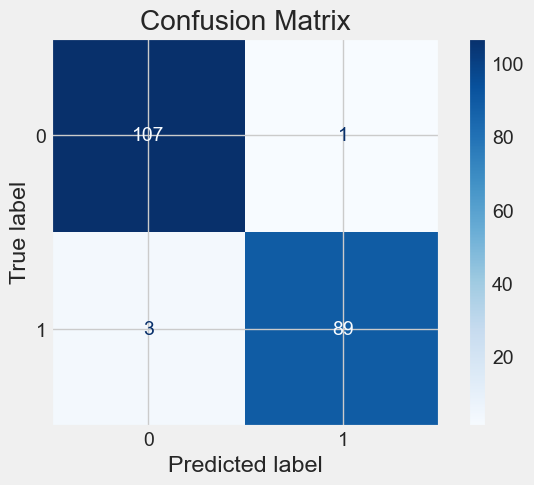

In [53]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Display the confusion matrix
ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=tu_modelo_LogisticRegression.classes_).plot(cmap="Blues")
plt.title("Confusion Matrix")
plt.show()


#### 2. Precision


In [54]:
from sklearn.metrics import precision_score

precision = precision_score(y_test, y_pred)

precision

np.float64(0.9888888888888889)



#### 3. Recall


In [55]:
from sklearn.metrics import recall_score

In [57]:
recall = recall_score(y_test, y_pred)
recall


np.float64(0.967391304347826)



#### 4. F1 Score


In [59]:
from sklearn.metrics import f1_score
f1 = f1_score(y_test, y_pred)
f1

np.float64(0.978021978021978)

##### Esta métrica combina la precisión y el recall en una sola medida, siendo particularmente útil cuando hay un balance entre ambas métricas:

##### Un valor cercano a 1 indica un buen equilibrio entre precisión y recall.
##### El modelo logra un buen rendimiento general al clasificar correctamente tanto los casos positivos como negativos.



#### 5. ROC curve

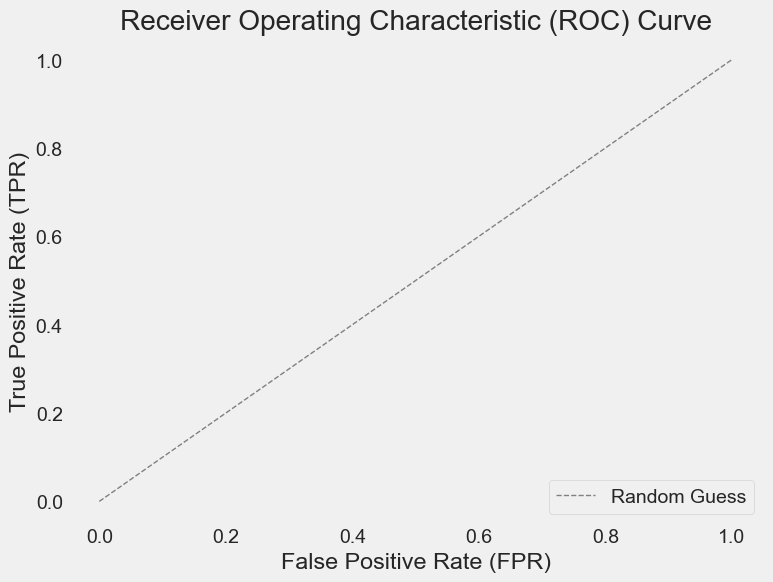

In [65]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, y_pred)

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, tu_modelo_LogisticRegression.predict_proba(X_test)[:, 1])


# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--', label='Random Guess')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid()
plt.show()


In [87]:
thresholds

array([2, 1, 0], dtype=int64)

Text(0, 0.5, 'True Positive Rate')

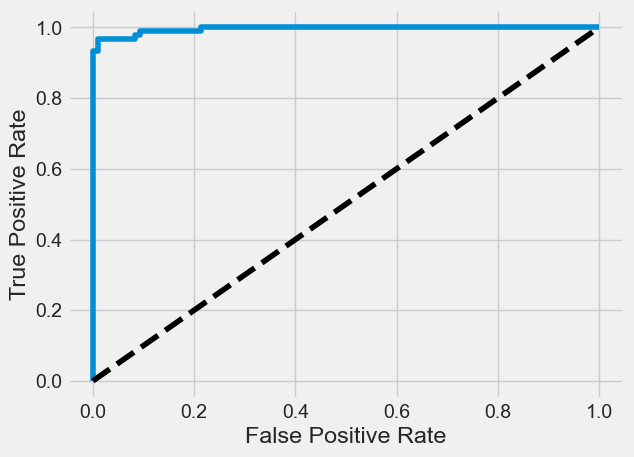

In [66]:
plt.plot(fpr,tpr)
plt.plot([0,1],[0,1], "k--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")

In [88]:
log_reg1.classes_

array([0, 1], dtype=int64)

In [90]:
pred_prob_1 = y_pred_prob[:,1]

In [91]:
fpr, tpr, thresholds = roc_curve(y_test, pred_prob_1)

In [ ]:
# fpr = FP/(TN+FP)

In [100]:
fpr[4]

0.009259259259259259

In [ ]:
# tpr = TP/(TP+FN)

In [101]:
tpr[4]

0.967391304347826

In [103]:
thresholds

array([1.99998183, 0.99998183, 0.81565203, 0.7879659 , 0.53351516,
       0.23504295, 0.20760222, 0.20133097, 0.18946342, 0.08902957,
       0.08403867, 0.00597066])

Text(0, 0.5, 'True Positive Rate')

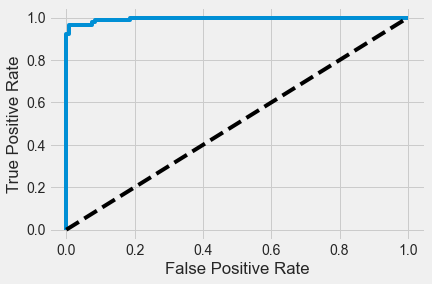

In [92]:
plt.plot(fpr,tpr)
plt.plot([0,1],[0,1], "k--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")

In [97]:
import numpy as np
gmeans = np.sqrt(tpr * (1-fpr))
ix = np.argmax(gmeans)
thresholds[ix]

0.5335151634308553

In [ ]:
from sklearn.metrics import precision_recall_curve
precisions, recalls, thresholds = precision_recall_curve(y_test, y_pred)

In [110]:
from sklearn.metrics import precision_recall_curve
precisions, recalls, thresholds = precision_recall_curve(y_test, pred_prob_1)

In [111]:
precisions

array([0.82142857, 0.81981982, 0.82727273, 0.83486239, 0.84259259,
       0.85046729, 0.85849057, 0.86666667, 0.875     , 0.88349515,
       0.89215686, 0.9009901 , 0.91      , 0.90909091, 0.91836735,
       0.91752577, 0.92708333, 0.93684211, 0.94680851, 0.95698925,
       0.9673913 , 0.97802198, 0.98888889, 0.98876404, 0.98863636,
       0.98850575, 0.98837209, 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.     

In [112]:
recalls

array([1.        , 0.98913043, 0.98913043, 0.98913043, 0.98913043,
       0.98913043, 0.98913043, 0.98913043, 0.98913043, 0.98913043,
       0.98913043, 0.98913043, 0.98913043, 0.97826087, 0.97826087,
       0.9673913 , 0.9673913 , 0.9673913 , 0.9673913 , 0.9673913 ,
       0.9673913 , 0.9673913 , 0.9673913 , 0.95652174, 0.94565217,
       0.93478261, 0.92391304, 0.92391304, 0.91304348, 0.90217391,
       0.89130435, 0.88043478, 0.86956522, 0.85869565, 0.84782609,
       0.83695652, 0.82608696, 0.81521739, 0.80434783, 0.79347826,
       0.7826087 , 0.77173913, 0.76086957, 0.75      , 0.73913043,
       0.72826087, 0.7173913 , 0.70652174, 0.69565217, 0.68478261,
       0.67391304, 0.66304348, 0.65217391, 0.64130435, 0.63043478,
       0.61956522, 0.60869565, 0.59782609, 0.58695652, 0.57608696,
       0.56521739, 0.55434783, 0.54347826, 0.5326087 , 0.52173913,
       0.51086957, 0.5       , 0.48913043, 0.47826087, 0.4673913 ,
       0.45652174, 0.44565217, 0.43478261, 0.42391304, 0.41304

In [115]:
thresholds

array([0.08403867, 0.08902957, 0.09257543, 0.09666638, 0.097511  ,
       0.10038035, 0.1075405 , 0.11834532, 0.12588388, 0.14508644,
       0.16557064, 0.18387485, 0.18946342, 0.20133097, 0.20760222,
       0.23504295, 0.3059493 , 0.32272044, 0.33267427, 0.42855247,
       0.43387196, 0.43769698, 0.53351516, 0.57130262, 0.73217208,
       0.76077602, 0.7879659 , 0.81565203, 0.88053272, 0.89083278,
       0.89281489, 0.90982192, 0.9138384 , 0.93348077, 0.95272042,
       0.95998276, 0.96326777, 0.97099074, 0.97229677, 0.97316412,
       0.97591748, 0.98801255, 0.99207157, 0.99246667, 0.99304312,
       0.99404366, 0.99422512, 0.99454002, 0.99569833, 0.99589067,
       0.99606617, 0.99628401, 0.99658137, 0.99670109, 0.99675501,
       0.9971252 , 0.99736143, 0.99747336, 0.99752621, 0.99768684,
       0.99776397, 0.99798142, 0.99800444, 0.99802155, 0.99829534,
       0.9984926 , 0.99878569, 0.99906264, 0.99915764, 0.99925337,
       0.99935078, 0.99947823, 0.99958415, 0.99959564, 0.99959

In [119]:
df_pr_curve = pd.DataFrame(precisions[1:], columns=['precisions'])
df_pr_curve['recalls'] = recalls[1:]
df_pr_curve['thresholds'] = thresholds
df_pr_curve

,precisions,recalls,thresholds
0,0.819820,0.989130,0.084039
1,0.827273,0.989130,0.089030
2,0.834862,0.989130,0.092575
3,0.842593,0.989130,0.096666
4,0.850467,0.989130,0.097511
...,...,...,...
107,1.000000,0.043478,0.999958
108,1.000000,0.032609,0.999960
109,1.000000,0.021739,0.999961
110,1.000000,0.010870,0.999980


In [134]:
df_pr_curve[10:30]

,precisions,recalls,thresholds
10,0.900990,0.989130,0.165571
11,0.910000,0.989130,0.183875
12,0.909091,0.978261,0.189463
13,0.918367,0.978261,0.201331
14,0.917526,0.967391,0.207602
15,0.927083,0.967391,0.235043
16,0.936842,0.967391,0.305949
17,0.946809,0.967391,0.322720
18,0.956989,0.967391,0.332674
19,0.967391,0.967391,0.428552


Text(0, 0.5, 'Recall')

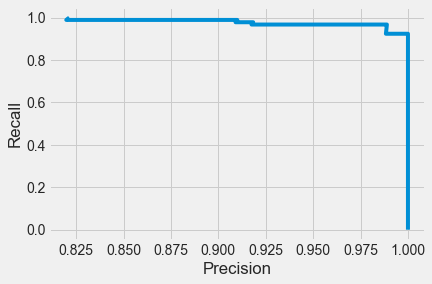

In [114]:
plt.plot(precisions, recalls)
plt.xlabel("Precision")
plt.ylabel("Recall")